In [1]:
import time
from datetime import datetime

start_time=time.time()

%matplotlib inline

import numpy as np
from numpy.random import seed
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
import tensorflow

# SVC
from sklearn.svm import SVC
# xgboost
import xgboost as xgb

# ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# logistic regression
from sklearn.linear_model import LogisticRegression

#linear
from sklearn.linear_model import SGDClassifier 

#KNN
from sklearn.neighbors import KNeighborsClassifier

# model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# voting
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import train_test_split

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train_data= pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
test_data['Survived']=-1
train_data['Set'] = "Train"
test_data['Set']="Test"
DATA= train_data.append(test_data)
DATA.reset_index(inplace=True)
DATA.dtypes

index            int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Set             object
dtype: object

In [3]:
print("Missing data:\n", DATA.isna().sum())

Missing data:
 index             0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Set               0
dtype: int64


In [4]:
Index_NaN_age= list(DATA['Age'][DATA['Age'].isnull()].index)
med_age= DATA.Age.median()

for i in Index_NaN_age:
    pred_age= DATA['Age'][((DATA.SibSp==DATA.iloc[i]['SibSp']) & (DATA.Parch ==DATA.iloc[i]['Parch']))].median()
    if np.isnan(pred_age):
        DATA.loc[DATA.index[i],'Age'] =med_age
    else:
        DATA.loc[DATA.index[i],'Age']=pred_age


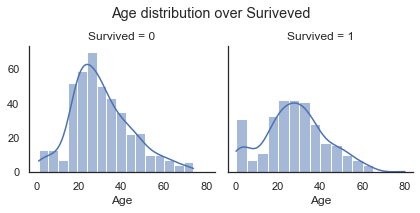

In [5]:
g= sns.FacetGrid(train_data, col='Survived')
g= g.map(sns.histplot, 'Age', kde=True)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution over Suriveved');

In [6]:
def cut_age(age):
    if age<=15:
        return 'child'
    if age>=60:
        return 'senior'
    return 'adult'

DATA['Age_Cat']= DATA.Age.apply(cut_age)



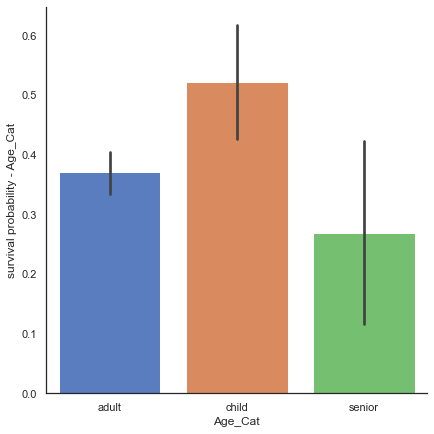

In [7]:
g=sns.catplot(x='Age_Cat', y='Survived', data=DATA[DATA.Set =='Train'], kind='bar', height=6, palette ='muted')


g = g.set_ylabels('survival probability - Age_Cat')

In [8]:
def get_title(sex, name):
    split_name = name.split(',')
    surname =split_name[0].strip(' ')
    title = split_name[1].split('.')[0].strip(' ')
    common_titles = ['Mr','Miss','Mrs','Master']

    if title not in common_titles:
        title =sex
    return title, surname

DATA[['Title', 'Surname']]= DATA[['Sex', 'Name']].apply(lambda row: get_title(*row), axis=1, result_type='expand')
DATA.head()


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Age_Cat,Title,Surname
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,adult,Mr,Braund
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,adult,Mrs,Cumings
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,adult,Miss,Heikkinen
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,adult,Mrs,Futrelle
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,adult,Mr,Allen


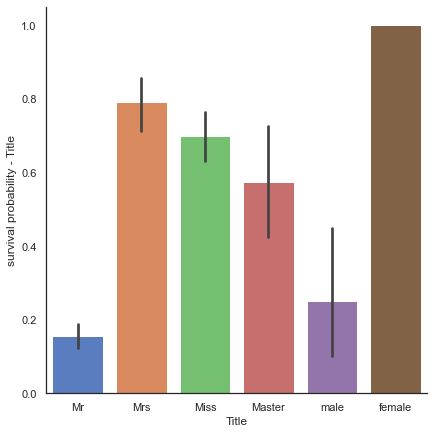

In [9]:
g = sns.catplot(x="Title",y="Survived", data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - Title")

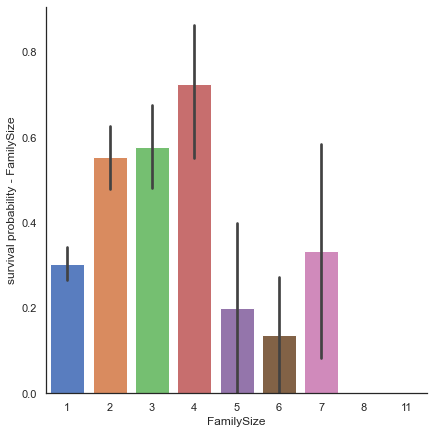

In [10]:
DATA['FamilySize']=DATA.SibSp + DATA.Parch +1
g = sns.catplot(x="FamilySize",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - FamilySize")

In [11]:
def familySize_to_cat(size):
    if size == 1: return 'alone'
    if size >= 2 and size <=4: return 'small'
    if size >=5 and size<=7: return 'medium'
    if size >7: return 'large'

DATA['FamilySizeCategory']=DATA.FamilySize.apply(familySize_to_cat
)

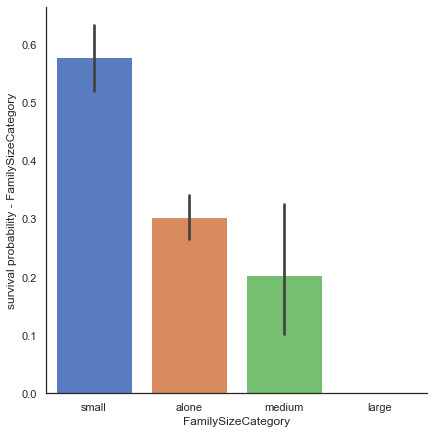

In [12]:
g = sns.catplot(x="FamilySizeCategory",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - FamilySizeCategory")

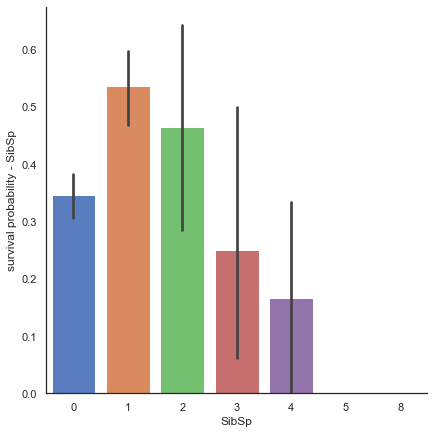

In [13]:
g = sns.catplot(x="SibSp",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - SibSp")

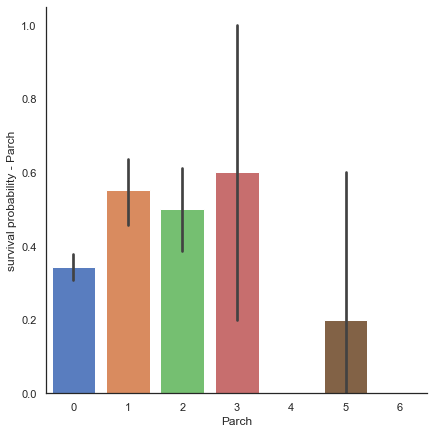

In [14]:
g= sns.catplot(x='Parch', y='Survived', data=DATA[DATA.Set =='Train'], kind='bar', height= 6, palette ='muted')
g= g.set_ylabels('survival probability - Parch')

In [15]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Set              0
dtype: int64

In [16]:
DATA.Embarked.fillna('S', inplace=True)

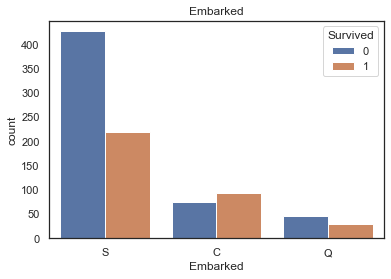

In [17]:
ax = sns.countplot(data = DATA[DATA.Set == 'Train'], x = 'Embarked', hue = "Survived");
ax.set_title("Embarked");

In [18]:
for i in DATA.index:
    
    # adult male
    if DATA.iloc[i]['Sex'] == 'male' and DATA.iloc[i]['Age_Cat'] == 'adult':
        DATA.loc[DATA.index[i],'SG'] = "adult_male"
        #DATA.loc[DATA.index[i],'FSR'] = 0
        DATA.loc[DATA.index[i],'FSR'] = 0.15
        continue

    family = DATA[(DATA.Surname == DATA.iloc[i]["Surname"]) & (DATA.Ticket == DATA.iloc[i]["Ticket"])]
    kids = family[family.Age_Cat == 'child']
    N_kids = len(kids)

    # no_children
    if N_kids == 0:
        DATA.loc[DATA.index[i],'SG'] = "no_children"
        #DATA.loc[DATA.index[i],'FSR'] = 1
        # based on actual ratio
        DATA.loc[DATA.index[i],'FSR'] = 0.75
        continue
        
    if N_kids == 1 and len(family) == 1:
        DATA.loc[DATA.index[i],'SG'] = "solo_kid"
         # based on actual ratio
        DATA.loc[DATA.index[i],'FSR'] = 0.63
        continue

    wc_group =family[family.Title !='Mr']
    survived = wc_group[wc_group.Survived != -1]['Survived'].to_list()

    if len(survived) ==0:
        DATA.loc[DATA.index[i], 'SG'] = 'group_died'
        DATA.loc[DATA.index[i],'FSR'] =0
        continue

    if np.mean(survived) >=0.5:
        DATA.loc[DATA.index[i], 'SG']='group_survived'
    else:
        DATA.loc[DATA.index[i],'SG']='group_died'

    DATA.loc[DATA.index[i], 'FSR']= np.mean(survived)



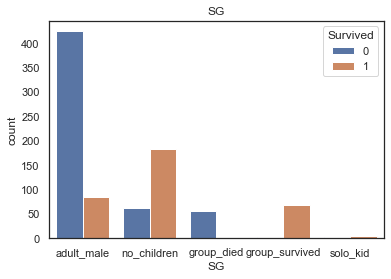

In [19]:
ax = sns.countplot(data = DATA[DATA.Set == 'Train'], x = 'SG', hue = "Survived");
ax.set_title("SG");

In [20]:
DATA[(DATA.Set=='Train') & (DATA.SG =='no_children')]['Survived'].value_counts() /len(DATA[(DATA.Set =='Train') & (DATA.SG =='no_children')]['Survived'])


1    0.746939
0    0.253061
Name: Survived, dtype: float64

In [21]:
DATA[(DATA.Set == 'Train')& (DATA.SG =='solo_kid')]['Survived'].value_counts()/len(DATA[(DATA.Set =='Train')& (DATA.SG =='solo_kid')]['Survived'])

1    0.625
0    0.375
Name: Survived, dtype: float64

In [22]:
DATA[(DATA.Set == 'Train') & (DATA.SG == 'adult_male')]['Survived'].value_counts()/len(DATA[(DATA.Set == 'Train') & (DATA.SG == 'adult_male')]['Survived'])

0    0.833333
1    0.166667
Name: Survived, dtype: float64

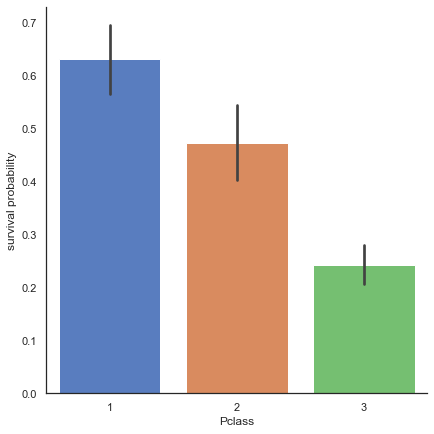

In [23]:
g = sns.catplot(x="Pclass",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability")

In [24]:
DATA['RealFare'] =DATA.Fare/ DATA.FamilySize

index_zero =list(DATA['RealFare'][(DATA['RealFare']==0) | (DATA['Fare'].isna())].index)
for i in index_zero:
    med_fare =DATA['RealFare'][(DATA.Pclass==DATA.iloc[i]['Pclass'])].median()
    DATA.loc[DATA.index[i], 'RealFare']= med_fare

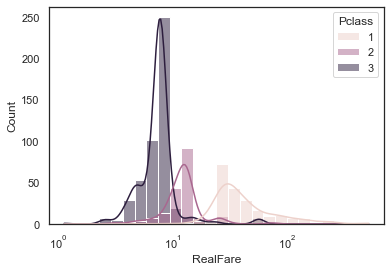

In [25]:
sns.histplot(data = DATA[DATA.Set == 'Train'], x='RealFare', hue='Pclass', kde=True, log_scale=True);

In [26]:
DATA['RealFare'].describe()
DATA['FareBins'] = pd.cut(DATA['RealFare'], [0, 5,10, 25, 50, 100, np.inf], labels = ['0-5', '5-10', '10-25', '25-50', '50-100', '>100'], include_lowest = True)
DATA['FareBins'].value_counts()

5-10      628
10-25     249
25-50     228
0-5       101
50-100     66
>100       37
Name: FareBins, dtype: int64

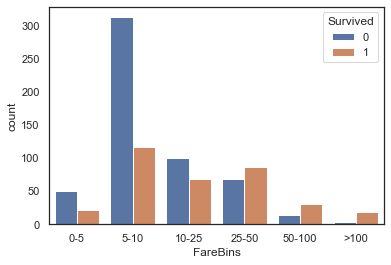

In [27]:
sns.countplot(data = DATA[DATA.Set == 'Train'], x='FareBins',  hue='Survived');

In [28]:
def get_deck(cabin):
    if cabin is np.nan or cabin.startswith('T'):
        return 'X'
    else:
        return cabin[0]
    
DATA.Cabin = DATA.Cabin.apply(get_deck)

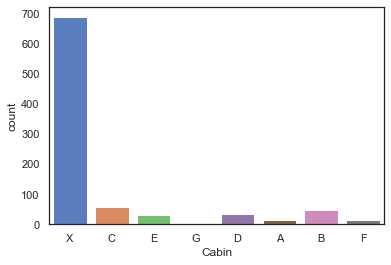

In [29]:
g = sns.countplot(x="Cabin",data=DATA[DATA.Set == 'Train'],palette = "muted");

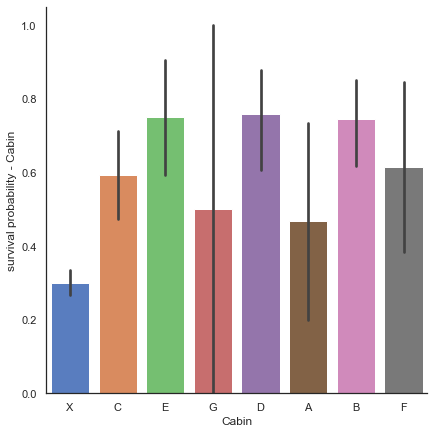

In [30]:
g = sns.catplot(x="Cabin",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - Cabin")

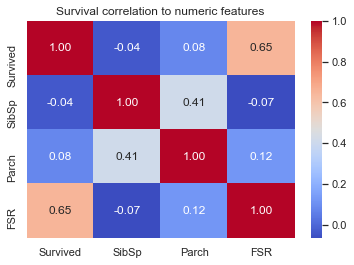

In [31]:
ax = sns.heatmap(DATA[DATA.Set == 'Train'][['Survived',"SibSp","Parch", "FSR"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm");
ax.set_title("Survival correlation to numeric features");

In [32]:
mm = MinMaxScaler()
scale_features = ["SibSp","Parch"]
DATA[scale_features] = mm.fit_transform(DATA[scale_features])

In [33]:
_Embarked =DATA[DATA.Set =='Train'].Embarked
_PClass =DATA[DATA.Set =='Train'].Pclass
_Cabin = DATA[DATA.Set =='Train'].Cabin
_Title = DATA[DATA.Set =='Train'].Title
_Family = DATA[DATA.Set =='Train'].FamilySizeCategory
_Sex = DATA[DATA.Set =='Train'].Sex
_Age = DATA[DATA.Set =='Train'].Age
_Fare = DATA[DATA.Set =='Train'].FareBins
_SG = DATA[DATA.Set =='Train'].SG
_FSR = DATA[DATA.Set =='Train'].FSR

#train

T_Embarked = DATA[DATA.Set == 'Train'].Embarked
T_PClass = DATA[DATA.Set == 'Train'].Pclass
T_Cabin = DATA[DATA.Set == 'Train'].Cabin
T_Title = DATA[DATA.Set == 'Train'].Title
T_Family = DATA[DATA.Set == 'Train'].FamilySizeCategory
T_Sex = DATA[DATA.Set == 'Train'].Sex
T_Age = DATA[DATA.Set == 'Train'].Age
T_Fare = DATA[DATA.Set == 'Train'].FareBins
T_SG = DATA[DATA.Set == 'Train'].SG
T_FSR = DATA[DATA.Set == 'Train'].FSR


In [34]:
redundant_features = ['Age', 'Ticket',"FamilySize", "Name",'Surname','Fare','RealFare']
DATA.drop(redundant_features, inplace = True, axis = 1)

In [35]:
categorical = ['Cabin','Pclass','FamilySizeCategory','Title','Embarked', "SG", "Age_Cat", "Sex",'FareBins']
DATA = pd.get_dummies(DATA,columns=categorical)

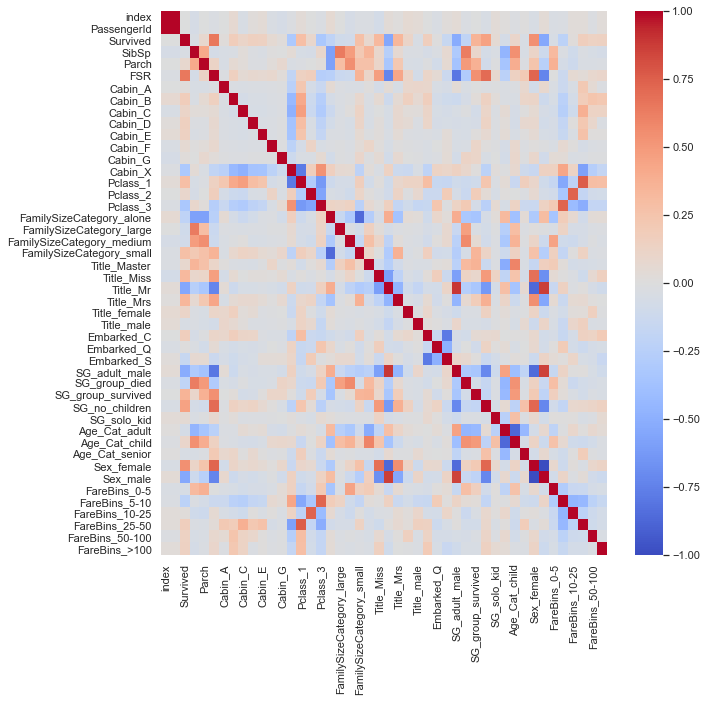

In [36]:
fig, ax = plt.subplots(figsize=(10,10))     
g = sns.heatmap(DATA[DATA.Set == 'Train'].corr(),annot=False, cmap = "coolwarm")

In [37]:
TRAIN =DATA[DATA.Set =='Train']
TEST = DATA[DATA.Set =='Test']

PassengerIds =TEST.PassengerId.to_list()
TEST=TEST.drop(['PassengerId', 'Set','Survived', 'index'], axis=1)
y=TRAIN.Survived
X =TRAIN.drop(['Survived','PassengerId', 'Set', 'index'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=13, stratify=y)


In [38]:
X.head()

,SibSp,Parch,FSR,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Age_Cat_child,Age_Cat_senior,Sex_female,Sex_male,FareBins_0-5,FareBins_5-10,FareBins_10-25,FareBins_25-50,FareBins_50-100,FareBins_>100
0,0.125,0.0,0.15,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.125,0.0,0.75,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.000,0.0,0.75,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.125,0.0,0.75,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.000,0.0,0.15,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [39]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show() 

In [40]:
seed(13)
tensorflow.random.set_seed(13)

dnn_model = Sequential()
n_cols = X.shape[1]
dnn_model.add(Dense(128, activation="relu", input_shape = (n_cols,))) 
dnn_model.add(Dense(64, activation="relu"))
dnn_model.add(Dense(32, activation="relu"))
dnn_model.add(Dense(16, activation="relu"))
dnn_model.add(Dense(8, activation="relu"))
dnn_model.add(Dense(4, activation="relu"))
dnn_model.add(Dense(2, activation="relu"))
dnn_model.add(Dense(1, activation="sigmoid"))              
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               5632      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1

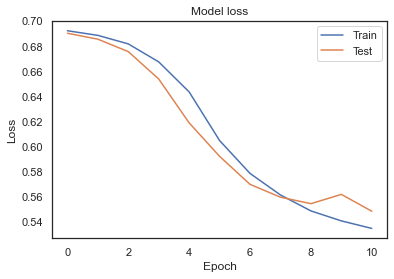

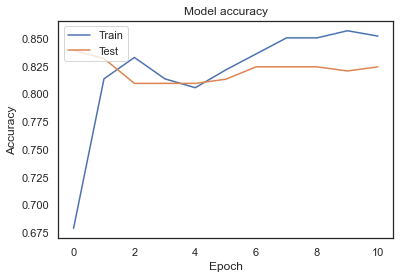

9/9 [==============================] - 0s 624us/step - loss: 0.5486 - accuracy: 0.8246
Train accuracy: 85.87 %
Accuracy: 82.46 %
Overfit: 3.41 % 


In [41]:
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=10, monitor='val_accuracy')
dnn_model.fit(X_train,y_train, validation_data=(X_test,y_test), callbacks=[early_stopping_monitor], epochs=200,batch_size=64, verbose=0)

plot_loss(dnn_model.history.history['loss'], dnn_model.history.history['val_loss'])
plot_accuracy(dnn_model.history.history['accuracy'], dnn_model.history.history['val_accuracy'])

_, train_dnn_accuracy = dnn_model.evaluate(X_train, y_train)
_, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print('Train accuracy: {:.2f} %'.format(train_dnn_accuracy*100))
print('Accuracy: {:.2f} %'.format(dnn_accuracy*100))
print('Overfit: {:.2f} % '.format((train_dnn_accuracy - dnn_accuracy)*100))